# Plot GSM and HERA Fields

In [1]:
import numpy as np
import sys
import os
import imp

import astropy.units as u
from astropy.coordinates import SkyCoord

root = os.path.join(os.getcwd(), "../")
sys.path.append(root)

import diffuse as df 

import matplotlib.pyplot as plt
import matplotlib.colors as colors

## Load Diffuse Model

In [2]:
path = "/home/pascal/PhD Project/Data/eGSM/diffuse.dat"
eGSM = df.DiffuseModel()
gsm = eGSM.read_gsm([150, 160], unit="TRJ", resolution="high")

In [3]:
coord = eGSM.get_equatorial()
sky = eGSM.data

-1.5699989668314616 1.5699989668314616 0.0 6.282418316785643


In [4]:
from scipy.interpolate import griddata
xi = np.linspace(0, 2*np.pi, 1000)
yi = np.linspace(-np.pi/2, np.pi/2, 1000)
zi = griddata((coord[0] * np.pi / 180, coord[1] * np.pi / 180), eGSM.data.swapaxes(0, 1), (xi[None,:], yi[:,None]), method='nearest')

## Bright Sources

In [5]:
sources = {
    "Fornax A": {
        "Coord": SkyCoord("03h22m41s", "-37d12m30s"),
        "Flux": 750 * u.Jy,
        "Frequency": 154 * u.MHz,
        "alpha": -0.78,
    },
    "Pictor A": {
        "Coord": SkyCoord("05h19m50s", "-45d46m44s"),
        "Flux": 390 * u.Jy,
        "Frequency": 200 * u.MHz,
        "alpha": -0.99,
    },
    "Centaurus A": {
        "Coord": SkyCoord("13h25m28s", "-43d01m09s"),
        "Flux": 1370 * u.Jy,
        "Frequency": 200 * u.MHz,
        "alpha": -0.5,
    },
    "Hydra A": {
        "Coord": SkyCoord("09h18m06s", "-12d05m44s"),
        "Flux": 280 * u.Jy,
        "Frequency": 200 * u.MHz,
        "alpha": -0.96,
    },
    "Hercules A": {
        "Coord": SkyCoord("16h51m08s", "04d59m33s"),
        "Flux": 377 * u.Jy,
        "Frequency": 200 * u.MHz,
        "alpha": -1.07,
    },
    "Virgo A": {
        "Coord": SkyCoord("12h30m49s", "12d23m28s"),
        "Flux": 861 * u.Jy,
        "Frequency": 200 * u.MHz,
        "alpha": -0.86,
    },
    "Crab": {
        "Coord": SkyCoord("05h34m32s", "22d00m52s"),
        "Flux": 1340 * u.Jy,
        "Frequency": 200 * u.MHz,
        "alpha": -0.22,
    },
    "Cygnus A": {
        "Coord": SkyCoord("19h59m28s", "40d44m02s"),
        "Flux": 7920 * u.Jy,
        "Frequency": 200 * u.MHz,
        "alpha": -0.78,
    },
    "Cassiopeia A": {
        "Coord": SkyCoord("23h23m28s", "58d48m42s"),
        "Flux": 11900 * u.Jy,
        "Frequency": 200 * u.MHz,
        "alpha": -0.41,
    },
}

## Plot

<ipython-input-6-08585cd05853>:8: UserWarning: The following kwargs were not used by contour: 'aspect', 'lw'
  im = ax.contourf(xi * 12 / np.pi, yi * 180 / np.pi, zi[..., 1] , levels=10**np.linspace(2.0, 4.0, 100), cmap="gist_heat", aspect="auto", linestyles="None", lw=0, norm=colors.LogNorm())


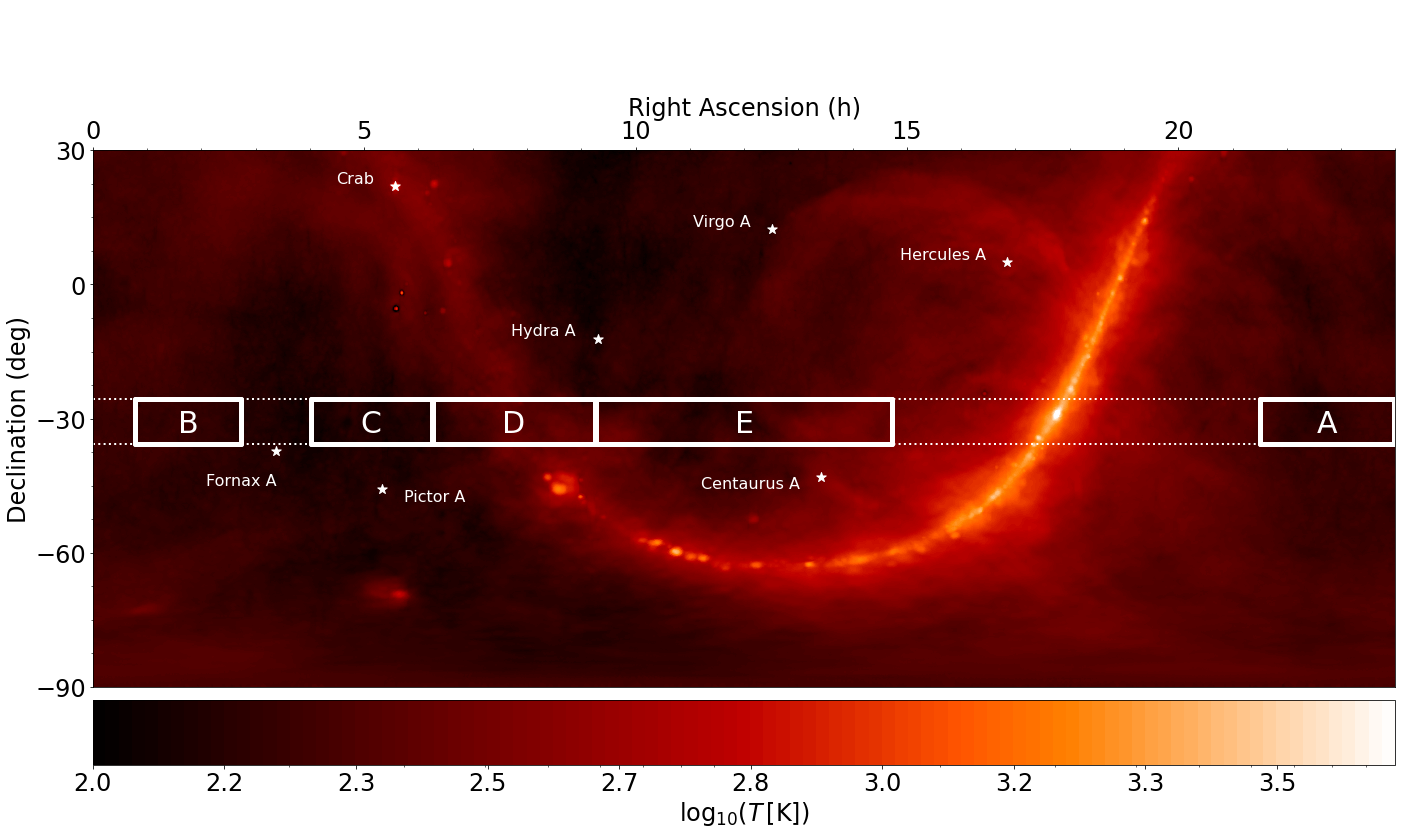

In [6]:
HERA_LAT = -30.72138329631366 

plt.rcParams['font.size'] = 24

zi[np.where((np.isnan(zi)) | (zi < 100))] = 100

fig, ax = plt.subplots(1, 1, figsize=(20, 12))
im = ax.contourf(xi * 12 / np.pi, yi * 180 / np.pi, zi[..., 1] , levels=10**np.linspace(2.0, 4.0, 100), cmap="gist_heat", aspect="auto", linestyles="None", lw=0, norm=colors.LogNorm())
ax.hlines([HERA_LAT-5,  HERA_LAT+5] , 0, 24, linewidth=2, linestyles="dotted", color="white")

for source in sources:
    ra, dec = sources[source]["Coord"].ra.deg, sources[source]["Coord"].dec.deg

    if source == "Fornax A":
        ax.scatter(ra / 15, dec, color="white", marker="*", s=100)
        ax.text(ra / 15, dec - 5, source, color="white", fontsize=16, va="top", ha="right")
    elif source == "Pictor A":
        ax.scatter(ra / 15, dec, color="white", marker="*", s=100)
        ax.text(ra / 15 + 0.4, dec, source, color="white", fontsize=16, va="top", ha="left")
    elif source == "Centaurus A":
        ax.scatter(ra / 15, dec, color="white", marker="*", s=100)
        ax.text(ra / 15 - 0.4, dec, source, color="white", fontsize=16, va="top", ha="right")
    else:
        ax.scatter(ra / 15, dec, color="white", marker="*", s=100)
        ax.text(ra / 15 - 0.4, dec, source, color="white", fontsize=16, va="bottom", ha="right")

fields = np.array([[21.5, 24.0], [0.75, 2.75], [4.0, 6.25], [6.25, 9.25], [9.25, 14.75]])

for field, fname in zip(fields, ["A", "B", "C", "D", "E"]):
    ra = xi[np.where((xi * 12 / np.pi > field[0]) & (xi * 12 / np.pi < field[1]))[0]] * 12 / np.pi
    ax.hlines([HERA_LAT-5,  HERA_LAT+5], min(ra), max(ra), linewidth=5, linestyles="solid", color="white", capstyle='round')
    ax.vlines([min(ra), max(ra)], HERA_LAT-5,  HERA_LAT+5, linewidth=5, linestyles="solid", color="white", capstyle='round')
    ax.text(np.mean(ra), -33, fname, color="white", fontsize=30, ha="center")

ax.set_xlim([0, 24])
ax.set_ylim([-90, 30])
ax.minorticks_on()
ax.set_yticks([-90, -60, -30, 0, 30])
ax.set_xlabel("Right Ascension (h)")
ax.set_ylabel("Declination (deg)")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
cbar = plt.colorbar(im, label=r"$\log_{10}(T\, \mathrm{[K]})$", orientation="horizontal", pad = 0.02)
cbar.ax.set_xticklabels(np.linspace(2, 3.5, 10).round(1));
plt.tight_layout()
plt.savefig("/home/pascal/Documents/PhD/H1C_IDR3_2/Figures/map.png", dpi=200)